In [1]:
from finviz.screener import Screener
import finviz
# https://github.com/mariostoev/finviz

import requests
import json
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.preprocessing import MinMaxScaler

# https://github.com/Karthikeya-t/Lstm_stock_prediction/blob/main/Stock_prediction.ipynb
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
filters = ['cap_smallunder', 'sh_avgvol_o1000'] 
stock_list = Screener(filters=filters, table='Performance')

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:11<00:00,  2.60it/s]


In [3]:
stock_list.to_csv("stock.csv")
stock = pd.read_csv("stock.csv")
stock

,No.,Ticker,Perf Week,Perf Month,Perf Quart,Perf Half,Perf Year,Perf YTD,Volatility W,Volatility M,Recom,Avg Volume,Rel Volume,Price,Change,Volume
0,1,ABEO,17.76%,19.82%,-56.51%,-78.09%,-88.11%,-16.77%,13.63%,10.52%,2.30,3.67M,1.21,0.27,-2.99%,"1,362,856"
1,2,ABSI,10.61%,48.24%,-15.79%,-49.04%,-,13.17%,11.83%,8.47%,2.70,1.38M,0.23,9.33,0.54%,"98,422"
2,3,ABUS,-3.73%,22.53%,-1.27%,-8.28%,-19.06%,-20.31%,10.73%,8.29%,2.00,5.51M,0.50,3.10,-0.16%,"841,791"
3,4,ACB,-5.91%,-6.39%,-43.17%,-48.74%,-66.82%,-32.35%,7.76%,7.93%,3.50,5.63M,0.89,3.61,-1.37%,"1,542,018"
4,5,ACCD,-1.23%,-3.76%,-36.46%,-64.23%,-63.72%,-35.93%,9.28%,7.74%,1.40,1.02M,0.40,16.21,-4.03%,"125,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,590,ZOM,8.29%,37.83%,-4.83%,-35.47%,-81.15%,30.41%,17.58%,12.96%,2.00,17.65M,1.42,0.37,-7.01%,"7,711,192"
590,591,ZSAN,24.62%,-61.43%,-72.54%,-76.00%,-87.04%,-65.53%,18.57%,10.61%,1.70,6.78M,2.42,0.17,5.56%,"5,067,545"
591,592,ZUO,4.04%,-3.18%,-23.68%,-10.63%,-0.52%,-18.58%,7.24%,5.23%,2.20,1.05M,0.54,15.25,0.26%,"173,699"
592,593,ZY,1.60%,-20.34%,-59.96%,-70.77%,-,-43.20%,7.82%,7.72%,3.40,1.13M,0.53,3.71,-2.37%,"185,432"


In [4]:
ticker = stock['Ticker'].tolist()
ticker

['ABEO',
 'ABSI',
 'ABUS',
 'ACB',
 'ACCD',
 'ACET',
 'ACHR',
 'ACRX',
 'ACST',
 'ADGI',
 'ADMA',
 'ADMP',
 'ADTX',
 'ADVM',
 'ADXS',
 'AEHR',
 'AEI',
 'AERC',
 'AERI',
 'AEVA',
 'AFMD',
 'AGEN',
 'AGRX',
 'AHCO',
 'AHT',
 'AIKI',
 'AIV',
 'AKBA',
 'ALDX',
 'ALHC',
 'ALLK',
 'ALLO',
 'ALNA',
 'ALPP',
 'ALTO',
 'ALZN',
 'AMPE',
 'AMRN',
 'AMRS',
 'AMWL',
 'ANY',
 'API',
 'APM',
 'APPH',
 'APRN',
 'APTS',
 'AQB',
 'ARCO',
 'ARDS',
 'ARDX',
 'AREB',
 'ARI',
 'ARLO',
 'ARR',
 'ARRY',
 'ASRT',
 'ASTR',
 'ASXC',
 'ATAI',
 'ATER',
 'ATHE',
 'ATHX',
 'ATIP',
 'ATOS',
 'ATXI',
 'AUPH',
 'AVCT',
 'AVGR',
 'AVIR',
 'AVXL',
 'AVYA',
 'AWH',
 'AXL',
 'AZUL',
 'BARK',
 'BBBY',
 'BBI',
 'BBIG',
 'BBIO',
 'BBLG',
 'BCDA',
 'BDSI',
 'BEST',
 'BFLY',
 'BFRI',
 'BGCP',
 'BGRY',
 'BIG',
 'BIGC',
 'BIOL',
 'BIRD',
 'BITF',
 'BJDX',
 'BKD',
 'BKKT',
 'BLDE',
 'BLI',
 'BLNK',
 'BLU',
 'BLUE',
 'BNGO',
 'BODY',
 'BOXL',
 'BRMK',
 'BRQS',
 'BSFC',
 'BSIG',
 'BTB',
 'BTBT',
 'BTCS',
 'BVXV',
 'BYSI',
 'BZUN',
 

In [5]:
# Finnhub token
token = "c83s8nqad3ide9hed29g"

In [6]:
n_days = 14

In [7]:
stock = "TSLA"
r = requests.get('https://finnhub.io/api/v1/stock/insider-transactions?symbol='+stock+'&token='+token)
test = json.loads(r.text)
df = pd.DataFrame(data=test['data'])
df.sort_values(by=['transactionDate'], ascending = False)

,symbol,name,share,change,filingDate,transactionDate,transactionCode,transactionPrice
0,TSLA,Kirkhorn Zachary,56084,-1250,2022-02-22,2022-02-17,S,913.260
12,TSLA,DENHOLM ROBYN M,19500,-400,2022-02-03,2022-02-01,S,917.345
1,TSLA,DENHOLM ROBYN M,5000,-10100,2022-02-03,2022-02-01,S,934.124
21,TSLA,DENHOLM ROBYN M,29600,-400,2022-02-03,2022-02-01,S,906.293
20,TSLA,DENHOLM ROBYN M,29200,-400,2022-02-03,2022-02-01,S,907.580
...,...,...,...,...,...,...,...,...
1276,TSLA,Taneja Vaibhav,19904,363,2021-03-09,2021-03-05,M,0.000
1277,TSLA,Taneja Vaibhav,19541,540,2021-03-09,2021-03-05,M,0.000
1278,TSLA,Taneja Vaibhav,19001,385,2021-03-09,2021-03-05,M,0.000
1279,TSLA,Taneja Vaibhav,18616,2250,2021-03-09,2021-03-05,M,0.000


In [8]:
ticker_revised = []
for i in range(len(ticker)):
    stock = ticker[i]
    
    try:
        r = requests.get('https://finnhub.io/api/v1/stock/insider-transactions?symbol='+stock+'&token='+token)
        test = json.loads(r.text)
        df = pd.DataFrame(data=test['data'])
        df = df.sort_values(by=['transactionDate'], ascending = False)
        d = df.iloc[0]['transactionDate']
        transactionDate = datetime.strptime(d, "%Y-%m-%d")
        
        if datetime.now() - transactionDate < timedelta(days = 14):
            print(stock + " has recent transaction")
            ticker_revised.append(stock)
        
    except:
        print("No data for " + stock)

No data for ACB
No data for ACST
No data for ADXS
No data for AERC
AERI has recent transaction
No data for AFMD
ALZN has recent transaction
No data for ANY
No data for API
No data for APM
No data for ARCO
ARDX has recent transaction
No data for AREB
ARR has recent transaction
ASRT has recent transaction
No data for ATER
No data for ATHE
No data for ATHX
No data for ATIP
No data for ATOS
No data for ATXI
No data for AUPH
No data for AVCT
No data for AVGR
No data for AVIR
No data for AVXL
No data for AVYA
No data for AWH
No data for AXL
No data for AZUL
No data for BARK
No data for BBBY
No data for BBI
No data for BBIG
No data for BBIO
No data for BBLG
No data for BCDA
No data for BDSI
No data for BEST
No data for BFLY
No data for BFRI
No data for BGCP
No data for BGRY
No data for BIG
No data for BIGC
No data for BIOL
No data for BIRD
No data for BITF
No data for BJDX
No data for BKD
No data for BKKT
No data for BLDE
No data for BLI
No data for BLNK
No data for BLU
No data for BLUE
No da

In [9]:
ticker_revised

['AERI',
 'ALZN',
 'ARDX',
 'ARR',
 'ASRT',
 'FLDM',
 'GNLN',
 'HA',
 'HCSG',
 'PMT',
 'PUBM',
 'RDUS',
 'REAL',
 'RMO',
 'ROOT',
 'RXRX']

In [33]:
stock = ticker_revised[2]

r = requests.get('https://finnhub.io/api/v1/stock/insider-transactions?symbol='+stock+'&token='+token)

# Load the JSON file as a string.
test = json.loads(r.text)

In [34]:
# Convert the data into a dataframe.
df = pd.DataFrame(data=test['data'])

# Derived attributes from the data.
df['dollarAmount'] = df['change']*df['transactionPrice']
df['insiderPortfolioChange'] = df['change']/(df['share'] - df['change'])

# print(type(df['transactionPrice'][0]))
conditions = [
    (df['change'] >= 0) & (df['transactionPrice'] > 0),
    (df['change'] <= 0) & (df['transactionPrice'] > 0),
    (df['transactionPrice'] == 0)
]
values = ['Buy', 'Sale', 'Gift']
df['buyOrSale'] = np.select(conditions, values)

df

,symbol,name,share,change,filingDate,transactionDate,transactionCode,transactionPrice,dollarAmount,insiderPortfolioChange,buyOrSale
0,ARDX,Renz Justin A,333887,-1800,2022-02-25,2022-02-22,S,0.6700,-1206.0000,-0.005362,Sale
1,ARDX,Blanks Robert,399116,-1752,2022-02-25,2022-02-22,S,0.6700,-1173.8400,-0.004371,Sale
2,ARDX,Rosenbaum David P.,105026,-601,2022-02-25,2022-02-22,S,0.6700,-402.6700,-0.005690,Sale
3,ARDX,Rosenbaum David P.,349409,-1752,2022-02-25,2022-02-22,S,0.6700,-1173.8400,-0.004989,Sale
4,ARDX,Rodriguez Susan,333938,-3400,2022-02-25,2022-02-22,S,0.6700,-2278.0000,-0.010079,Sale
...,...,...,...,...,...,...,...,...,...,...,...
72,ARDX,Blanks Robert,106954,-612,2021-05-21,2021-05-20,S,7.0878,-4337.7336,-0.005690,Sale
73,ARDX,RAAB MICHAEL,214754,-2534,2021-05-21,2021-05-20,S,7.0878,-17960.4852,-0.011662,Sale
74,ARDX,Rosenbaum David P.,160047,-5000,2021-04-08,2021-04-06,S,8.0000,-40000.0000,-0.030294,Sale
75,ARDX,Blanks Robert,107566,-1826,2021-04-08,2021-04-06,S,8.0000,-14608.0000,-0.016692,Sale


In [35]:
finviz.get_stock(stock)

{'Company': 'Ardelyx, Inc.',
 'Sector': 'Healthcare',
 'Industry': 'Biotechnology',
 'Country': 'USA',
 'Website': 'https://www.ardelyx.com',
 'Index': '-',
 'P/E': '-',
 'EPS (ttm)': '-1.53',
 'Insider Own': '2.40%',
 'Shs Outstand': '104.14M',
 'Perf Week': '6.81%',
 'Market Cap': '73.82M',
 'Forward P/E': '-',
 'EPS next Y': '-1.03',
 'Insider Trans': '-70.70%',
 'Shs Float': '98.48M',
 'Perf Month': '-8.29%',
 'Income': '-150.80M',
 'PEG': '-',
 'EPS next Q': '-0.30',
 'Inst Own': '38.90%',
 'Short Float': '8.61%',
 'Perf Quarter': '-15.56%',
 'Sales': '10.90M',
 'P/S': '6.77',
 'EPS this Y': '28.50%',
 'Inst Trans': '-17.85%',
 'Short Ratio': '0.66',
 'Perf Half Y': '-49.44%',
 'Book/sh': '0.78',
 'P/B': '0.93',
 'EPS growth next Y': '29.10%',
 'ROA': '-76.60%',
 'Target Price': '5.50',
 'Perf Year': '-89.25%',
 'Cash/sh': '1.40',
 'P/C': '0.52',
 'EPS next 5Y': '30.00%',
 'ROE': '-132.30%',
 '52W Range': '0.58 - 9.23',
 'Perf YTD': '-33.82%',
 'Dividend': '-',
 'P/FCF': '-',
 'EP

In [36]:
finviz.get_insider(stock)

[{'Insider Trading': 'Rosenbaum David P.',
  'Relationship': 'Chief Development Officer',
  'Date': 'Feb 22',
  'Transaction': 'Sale',
  'Cost': '0.67',
  '#Shares': '601',
  'Value ($)': '403',
  '#Shares Total': '105,026',
  'SEC Form 4': 'Feb 25 04:55 PM'},
 {'Insider Trading': 'Rosenbaum David P.',
  'Relationship': 'Chief Development Officer',
  'Date': 'Feb 22',
  'Transaction': 'Sale',
  'Cost': '0.67',
  '#Shares': '1,752',
  'Value ($)': '1,174',
  '#Shares Total': '349,409',
  'SEC Form 4': 'Feb 25 04:55 PM'},
 {'Insider Trading': 'RAAB MICHAEL',
  'Relationship': 'President & CEO',
  'Date': 'Feb 22',
  'Transaction': 'Sale',
  'Cost': '0.67',
  '#Shares': '6,229',
  'Value ($)': '4,173',
  '#Shares Total': '775,574',
  'SEC Form 4': 'Feb 25 04:56 PM'},
 {'Insider Trading': 'Blanks Robert',
  'Relationship': 'See Remarks',
  'Date': 'Feb 22',
  'Transaction': 'Sale',
  'Cost': '0.67',
  '#Shares': '1,752',
  'Value ($)': '1,174',
  '#Shares Total': '399,116',
  'SEC Form 4':

stock_list.get_charts(period='m', chart_type='c', size='l', ta='0')

In [37]:
data = pdr.get_data_yahoo(stock)

In [38]:
df1 = data.reset_index().loc[:,"Close"]
df1

0       14.200
1       13.800
2       13.350
3       13.650
4       13.500
         ...  
1254     0.709
1255     0.788
1256     0.770
1257     0.728
1258     0.860
Name: Close, Length: 1259, dtype: float64

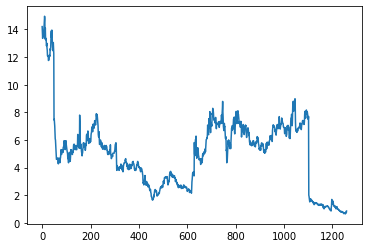

In [39]:
plt.plot(df1)

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [41]:
print(df1)

[[0.94754878]
 [0.91957482]
 [0.8881041 ]
 ...
 [0.00832226]
 [0.00538499]
 [0.01461641]]


In [42]:
# splitting dataset into train and test split
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]
training_size, test_size

(818, 441)

In [43]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [44]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [45]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [46]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [47]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [48]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 153ms/step - loss: 0.0250 - val_loss: 0.0145
Epoch 2/100
12/12 [==============================] - 1s 92ms/step - loss: 0.0058 - val_loss: 0.0124
Epoch 3/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0035 - val_loss: 0.0079
Epoch 4/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0025 - val_loss: 0.0061
Epoch 5/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0021 - val_loss: 0.0055
Epoch 6/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0019 - val_loss: 0.0055
Epoch 7/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0018 - val_loss: 0.0052
Epoch 8/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0018 - val_loss: 0.0050
Epoch 9/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0018 - val_loss: 0.0050
Epoch 10/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0017 - val_loss: 0.004

12/12 [==============================] - 1s 89ms/step - loss: 6.2128e-04 - val_loss: 0.0012
Epoch 81/100
12/12 [==============================] - 1s 89ms/step - loss: 6.3326e-04 - val_loss: 0.0013
Epoch 82/100
12/12 [==============================] - 1s 89ms/step - loss: 6.0396e-04 - val_loss: 0.0016
Epoch 83/100
12/12 [==============================] - 1s 89ms/step - loss: 6.9366e-04 - val_loss: 0.0014
Epoch 84/100
12/12 [==============================] - 1s 89ms/step - loss: 7.0318e-04 - val_loss: 0.0013
Epoch 85/100
12/12 [==============================] - 1s 89ms/step - loss: 6.6568e-04 - val_loss: 0.0012
Epoch 86/100
12/12 [==============================] - 1s 89ms/step - loss: 5.9360e-04 - val_loss: 0.0012
Epoch 87/100
12/12 [==============================] - 1s 89ms/step - loss: 5.9137e-04 - val_loss: 0.0012
Epoch 88/100
12/12 [==============================] - 1s 89ms/step - loss: 5.7994e-04 - val_loss: 0.0012
Epoch 89/100
12/12 [==============================] - 1s 89ms/step -

In [51]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [52]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [53]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

4.917759377781549

In [55]:
## Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

5.024191013835803

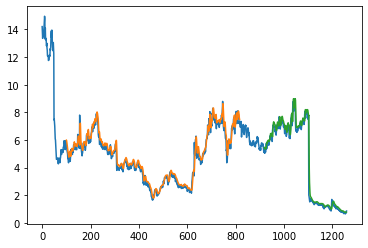

In [57]:
## Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()